In [89]:
import pandas as pd 

In [90]:
data=pd.read_csv(r"C:\Users\Sai Sailesh\Downloads\air-quality-data.csv")
data

,Timestamp,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78
...,...,...
31856,31-12-2021 19:00,72.25
31857,31-12-2021 20:00,71.56
31858,31-12-2021 21:00,70.27
31859,31-12-2021 22:00,66.78


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  31861 non-null  object 
 1   PM2.5      31861 non-null  float64
dtypes: float64(1), object(1)
memory usage: 498.0+ KB


In [92]:
data.rename(columns={'Timestamp':'DateTime'},inplace=True)
data

,DateTime,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78
...,...,...
31856,31-12-2021 19:00,72.25
31857,31-12-2021 20:00,71.56
31858,31-12-2021 21:00,70.27
31859,31-12-2021 22:00,66.78


In [93]:
data['DateTime']=pd.to_datetime(data['DateTime'],errors='coerce')
data

,DateTime,PM2.5
0,2018-01-01 00:00:00,90.19
1,2018-01-01 01:00:00,86.98
2,2018-01-01 02:00:00,86.06
3,2018-01-01 03:00:00,94.04
4,2018-01-01 04:00:00,108.78
...,...,...
31856,NaT,72.25
31857,NaT,71.56
31858,NaT,70.27
31859,NaT,66.78


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  12812 non-null  datetime64[ns]
 1   PM2.5     31861 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.0 KB


# 1. Show the Year-wise average pollution with a Line chart.

In [95]:
data.head()

,DateTime,PM2.5
0,2018-01-01 00:00:00,90.19
1,2018-01-01 01:00:00,86.98
2,2018-01-01 02:00:00,86.06
3,2018-01-01 03:00:00,94.04
4,2018-01-01 04:00:00,108.78


In [96]:
data['Year']=data['DateTime'].dt.year
data

,DateTime,PM2.5,Year
0,2018-01-01 00:00:00,90.19,2018.0
1,2018-01-01 01:00:00,86.98,2018.0
2,2018-01-01 02:00:00,86.06,2018.0
3,2018-01-01 03:00:00,94.04,2018.0
4,2018-01-01 04:00:00,108.78,2018.0
...,...,...,...
31856,NaT,72.25,NaN
31857,NaT,71.56,NaN
31858,NaT,70.27,NaN
31859,NaT,66.78,NaN


In [97]:
data=data.dropna()

In [98]:
data.isnull().sum()

DateTime    0
PM2.5       0
Year        0
dtype: int64

In [99]:
year_avg=data.groupby('Year')['PM2.5'].mean()
year_avg

Year
2018.0    55.350059
2019.0    51.703750
2020.0    43.167236
2021.0    44.013448
Name: PM2.5, dtype: float64

<Axes: xlabel='Year'>

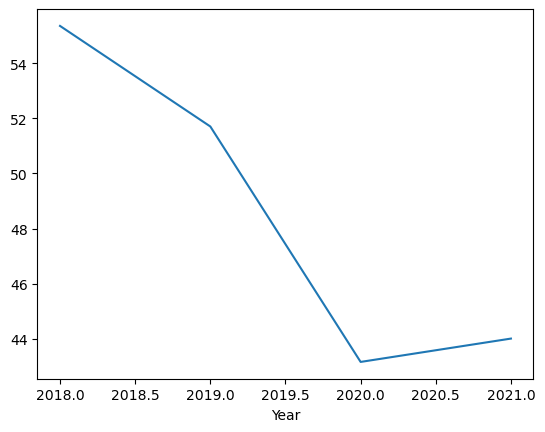

In [100]:
year_avg.plot(kind='line')

# 2. Draw the Area plot showing the average pollution Month wise.

In [101]:
data.loc[:,'Month']=data['DateTime'].dt.month
data

C:\Users\Sai Sailesh\AppData\Local\Temp\ipykernel_41324\3888248499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Month']=data['DateTime'].dt.month


,DateTime,PM2.5,Year,Month
0,2018-01-01 00:00:00,90.19,2018.0,1
1,2018-01-01 01:00:00,86.98,2018.0,1
2,2018-01-01 02:00:00,86.06,2018.0,1
3,2018-01-01 03:00:00,94.04,2018.0,1
4,2018-01-01 04:00:00,108.78,2018.0,1
...,...,...,...,...
31414,2021-12-12 19:00:00,77.58,2021.0,12
31415,2021-12-12 20:00:00,77.18,2021.0,12
31416,2021-12-12 21:00:00,78.09,2021.0,12
31417,2021-12-12 22:00:00,78.03,2021.0,12


In [102]:
monthly_avg=data.groupby('Month')['PM2.5'].mean()
monthly_avg

Month
1     48.464107
2     48.255515
3     46.889366
4     47.955303
5     48.668178
6     48.629443
7     46.970782
8     48.618370
9     49.929313
10    48.890964
11    50.064518
12    48.027854
Name: PM2.5, dtype: float64

<Axes: xlabel='Month'>

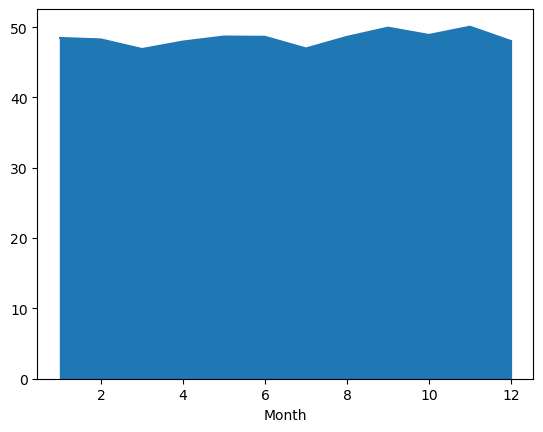

In [103]:
monthly_avg.plot(kind='area')

# Draw a Bar graph to show the Hour-wise average pollution.

In [104]:
data.head()

,DateTime,PM2.5,Year,Month
0,2018-01-01 00:00:00,90.19,2018.0,1
1,2018-01-01 01:00:00,86.98,2018.0,1
2,2018-01-01 02:00:00,86.06,2018.0,1
3,2018-01-01 03:00:00,94.04,2018.0,1
4,2018-01-01 04:00:00,108.78,2018.0,1


In [105]:
data.loc[:,'Hour']=data['DateTime'].dt.hour
data

C:\Users\Sai Sailesh\AppData\Local\Temp\ipykernel_41324\151918038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Hour']=data['DateTime'].dt.hour


,DateTime,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018.0,1,0
1,2018-01-01 01:00:00,86.98,2018.0,1,1
2,2018-01-01 02:00:00,86.06,2018.0,1,2
3,2018-01-01 03:00:00,94.04,2018.0,1,3
4,2018-01-01 04:00:00,108.78,2018.0,1,4
...,...,...,...,...,...
31414,2021-12-12 19:00:00,77.58,2021.0,12,19
31415,2021-12-12 20:00:00,77.18,2021.0,12,20
31416,2021-12-12 21:00:00,78.09,2021.0,12,21
31417,2021-12-12 22:00:00,78.03,2021.0,12,22


In [106]:
hour_avg=data.groupby('Hour')['PM2.5'].mean()
hour_avg

Hour
0     47.699700
1     47.221041
2     47.612892
3     49.772004
4     52.188766
5     52.784712
6     51.230037
7     48.393829
8     45.817362
9     43.426154
10    41.486257
11    40.160887
12    39.469607
13    40.088480
14    43.570807
15    48.470841
16    52.540777
17    54.765340
18    55.543981
19    55.178042
20    53.486660
21    52.196402
22    50.625356
23    49.138945
Name: PM2.5, dtype: float64

<Axes: xlabel='Hour'>

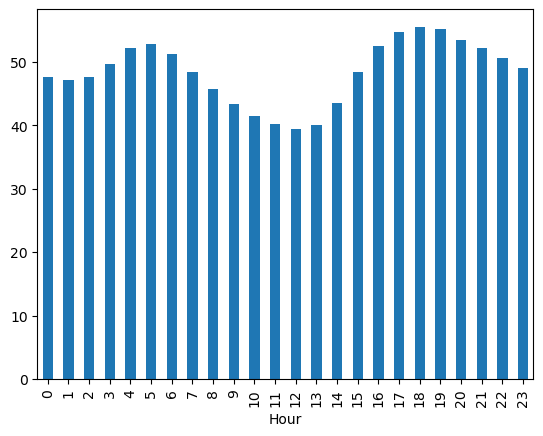

In [107]:
hour_avg.plot(kind='bar')

# Usually in which month/s, the air was recorded 'Very Unhealthy'.

In [108]:
data.head()

,DateTime,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018.0,1,0
1,2018-01-01 01:00:00,86.98,2018.0,1,1
2,2018-01-01 02:00:00,86.06,2018.0,1,2
3,2018-01-01 03:00:00,94.04,2018.0,1,3
4,2018-01-01 04:00:00,108.78,2018.0,1,4


In [109]:
unhealthy=data[(data['PM2.5']>=150.5) & (data['PM2.5']<=250.4)]
unhealthy

,DateTime,PM2.5,Year,Month,Hour
6,2018-01-06 17:00:00,150.89,2018.0,1,17
7,2018-11-07 21:00:00,245.63,2018.0,11,21
8,2018-11-08 00:00:00,175.19,2018.0,11,0
31,2018-11-07 22:00:00,232.03,2018.0,11,22
32,2018-11-08 01:00:00,169.15,2018.0,11,1
55,2018-11-07 20:00:00,223.21,2018.0,11,20
56,2018-11-08 03:00:00,160.34,2018.0,11,3
79,2018-11-07 18:00:00,212.56,2018.0,11,18
103,2018-11-07 19:00:00,207.41,2018.0,11,19
126,2018-11-07 17:00:00,183.19,2018.0,11,17


In [113]:
unhealthy['Month'].unique()

array([ 1, 11,  2])

In [114]:
unhealthy['Month'].value_counts()

Month
11    10
2      2
1      1
Name: count, dtype: int64

# 5. Usually in which month/s, the air was fresh(good).

In [117]:
fresh=data[(data['PM2.5']<=12.0)]
fresh

,DateTime,PM2.5,Year,Month,Hour
12661,2019-01-09 01:00:00,10.90,2019.0,1,1
12663,2019-01-09 03:00:00,10.99,2019.0,1,3
12664,2019-01-09 04:00:00,11.43,2019.0,1,4
12745,2019-04-09 13:00:00,8.74,2019.0,4,13
12746,2019-04-09 14:00:00,8.40,2019.0,4,14
12747,2019-04-09 15:00:00,8.77,2019.0,4,15
12758,2019-05-09 03:00:00,11.45,2019.0,5,3
12759,2019-05-09 04:00:00,11.90,2019.0,5,4


In [118]:
fresh['Month'].value_counts()

Month
1    3
4    3
5    2
Name: count, dtype: int64

In [119]:
fresh['Month'].unique()

array([1, 4, 5])

# 6. In year 2018, how many times the AQI was recorded 'Moderate'.

In [120]:
data.head(2)

,DateTime,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018.0,1,0
1,2018-01-01 01:00:00,86.98,2018.0,1,1


In [123]:
moderate=data[(data['Year']==2018) & (data['PM2.5']>=12.1) & (data['PM2.5']<=35.4)]
moderate

,DateTime,PM2.5,Year,Month,Hour
1820,2018-01-04 04:00:00,33.34,2018.0,1,4
2038,2018-12-04 00:00:00,35.39,2018.0,12,0
2473,2018-02-05 09:00:00,33.98,2018.0,2,9
2474,2018-02-05 10:00:00,34.33,2018.0,2,10
2475,2018-02-05 11:00:00,35.11,2018.0,2,11
...,...,...,...,...,...
9842,2018-08-08 00:00:00,20.26,2018.0,8,0
9845,2018-02-09 08:00:00,19.90,2018.0,2,8
9872,2018-03-07 07:00:00,20.14,2018.0,3,7
9920,2018-07-09 01:00:00,19.74,2018.0,7,1


# . How was the weather in the month of January and July.

In [124]:
data.head(2)

,DateTime,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018.0,1,0
1,2018-01-01 01:00:00,86.98,2018.0,1,1


In [129]:
data[(data['Month']==1)]['PM2.5'].mean()

48.4641073080481

In [130]:
data[(data['Month']==7)]['PM2.5'].mean()

46.97078154425612